## Reading the daily temperature in Vlissingen since 1906

The data from the different weatherstations per day is available as zipfiles. Below is some code to access these data directly.

In [5]:
import numpy as np
import pandas as pd

In [6]:
# plot settings 

import matplotlib.pyplot as plt
%matplotlib inline 

# Some default styling for the figures; best solution is once at the beginning of the code
# See https://matplotlib.org/3.1.3/tutorials/introductory/customizing.html
# These settings assume that you have used import matplotlib.pyplot as plt 

# Smallest font size is a 10 point font for a 4 inch wide figure. 
# font sizes and figure size are scaled by a factor 2 to have a large figure on the screen

SMALL_SIZE = 10*2                                        
MEDIUM_SIZE = 12*2
BIGGER_SIZE = 14*2

plt.rc('font', size=SMALL_SIZE, family='serif')          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)                     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)                    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE, direction='in')    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE, direction='in')    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)                    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)                  # fontsize of the figure title
plt.rc('figure', figsize='8, 6')                         # size of the figure, used to be '4, 3' in inches

In [4]:
day_310=pd.read_csv('https://cdn.knmi.nl/knmi/map/page/klimatologie/gegevens/daggegevens/etmgeg_310.zip', 
               skiprows=50)
day_310.columns=day_310.columns.str.strip(',') #remove the strange comma from the column names
day_310.columns=day_310.columns.str.strip(' ') #remove the spaces from the column names
day_310=day_310.apply(pd.to_numeric, errors='coerce') # This converts the strings to numbers
# This converts the YYYYMMDD to a date; gives problems later on
# df['YYYYMMDD'] = pd.to_datetime(df['YYYYMMDD'].astype(str), format='%Y%m%d') 
day_310.head()

C:\Users\michi\AppData\Local\Temp\ipykernel_2316\879606114.py:4: DtypeWarning: Columns (2,3,4,5,6,7,8,11,12,13,14,15,16,17,21,22,23,25,26,27,28,29,35) have mixed types. Specify dtype option on import or set low_memory=False.
  day_310=pd.read_csv('https://cdn.knmi.nl/knmi/map/page/klimatologie/gegevens/daggegevens/etmgeg_310.zip',


,# STN,YYYYMMDD,DDVEC,FHVEC,FG,FHX,FHXH,FHN,FHNH,FXX,...,VVNH,VVX,VVXH,NG,UG,UX,UXH,UN,UNH,EV24
0,310,19060101,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,66.0,NaN,NaN,NaN,NaN,NaN
1,310,19060102,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,73.0,NaN,NaN,NaN,NaN,NaN
2,310,19060103,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,91.0,NaN,NaN,NaN,NaN,NaN
3,310,19060104,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,94.0,NaN,NaN,NaN,NaN,NaN
4,310,19060105,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,95.0,NaN,NaN,NaN,NaN,NaN


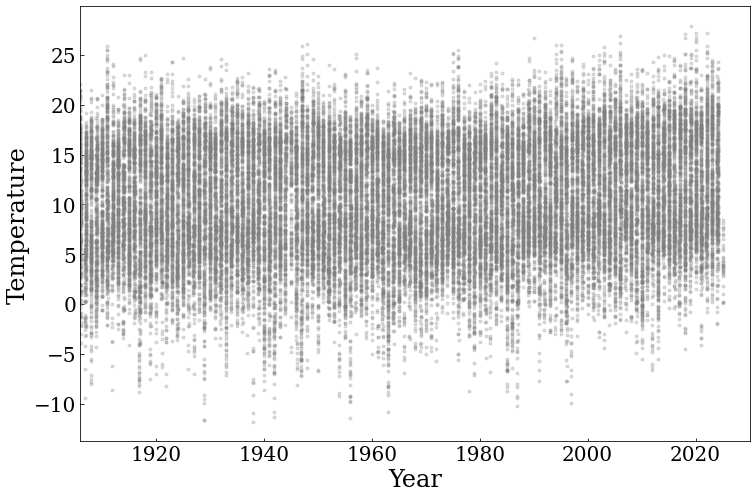

In [15]:
plt.figure(figsize=(12,8))
plt.plot(day_310['YYYYMMDD']/10000.0, day_310['TG']/10.0, ls='none', marker='o', markersize=3, color='gray', alpha=0.25)
plt.xlabel('Year') # Axes have labels!
plt.ylabel('Temperature')
plt.xlim([1906,2030])
plt.show()

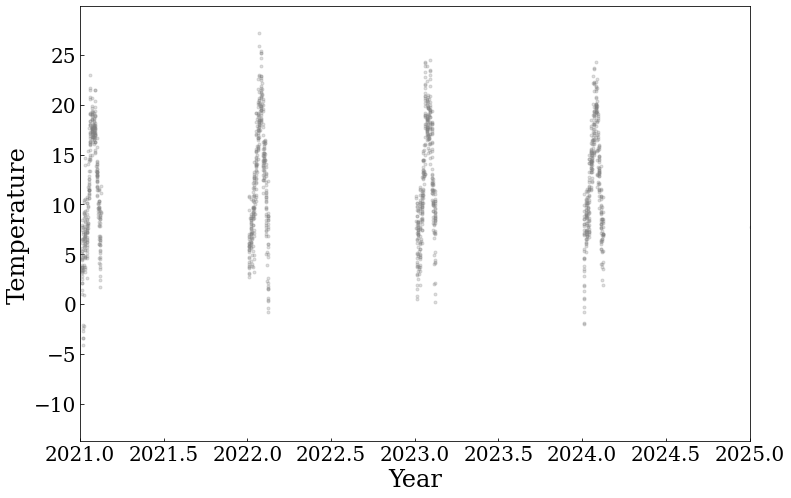

In [30]:
plt.figure(figsize=(12,8))
plt.plot(day_310['YYYYMMDD']/10000.0, day_310['TG']/10.0, ls='none', marker='o', markersize=3, color='gray', alpha=0.25)
plt.xlabel('Year') # Axes have labels!
plt.ylabel('Temperature')
plt.xlim([2021,2025])
plt.show()

In [26]:
hour_310=pd.read_csv('https://cdn.knmi.nl/knmi/map/page/klimatologie/gegevens/uurgegevens/uurgeg_310_2021-2030.zip', 
               skiprows=30)
hour_310.columns=hour_310.columns.str.strip(',') #remove the strange comma from the column names
hour_310.columns=hour_310.columns.str.strip(' ') #remove the spaces from the column names
hour_310=hour_310.apply(pd.to_numeric, errors='coerce') # This converts the strings to numbers
# This converts the YYYYMMDD to a date; gives problems later on
# df['YYYYMMDD'] = pd.to_datetime(df['YYYYMMDD'].astype(str), format='%Y%m%d') 
hour_310.head()

C:\Users\michi\AppData\Local\Temp\ipykernel_2316\952801277.py:1: DtypeWarning: Columns (15,16,20,21,22,23,24) have mixed types. Specify dtype option on import or set low_memory=False.
  hour_310=pd.read_csv('https://cdn.knmi.nl/knmi/map/page/klimatologie/gegevens/uurgegevens/uurgeg_310_2021-2030.zip',


,# STN,YYYYMMDD,HH,DD,FH,FF,FX,T,T10N,TD,...,VV,N,U,WW,IX,M,R,S,O,Y
0,310,20210101,1,300,30,40,60,35,NaN,18,...,70.0,7.0,88,NaN,5,0.0,0.0,0.0,0.0,0.0
1,310,20210101,2,180,30,40,60,36,NaN,20,...,70.0,8.0,89,23.0,7,0.0,1.0,0.0,0.0,0.0
2,310,20210101,3,220,30,30,50,30,NaN,18,...,65.0,7.0,91,23.0,7,0.0,1.0,0.0,0.0,0.0
3,310,20210101,4,220,40,40,50,31,NaN,19,...,65.0,7.0,91,NaN,5,0.0,0.0,0.0,0.0,0.0
4,310,20210101,5,300,20,10,50,37,NaN,26,...,60.0,8.0,92,81.0,7,0.0,1.0,0.0,0.0,0.0


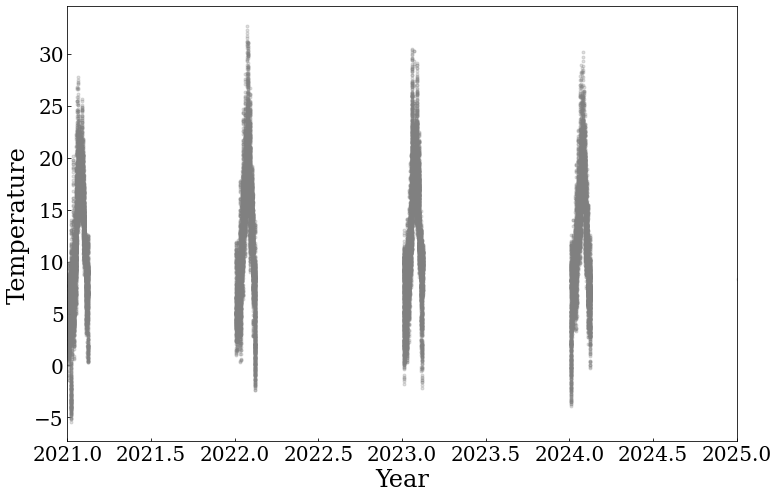

In [29]:
plt.figure(figsize=(12,8))
plt.plot(hour_310['YYYYMMDD']/10000.0, hour_310['T']/10.0, ls='none', marker='o', markersize=3, color='gray', alpha=0.25)
plt.xlabel('Year') # Axes have labels!
plt.ylabel('Temperature')
plt.xlim([2021,2025])
plt.show()